Hacemos la simulación del ejercicio con ayuda de nuestro catálogo, solo sustituyendo algunos valores.

La probabilidad de que el peso total exceda 1000 kg es aproximadamente 0.9979


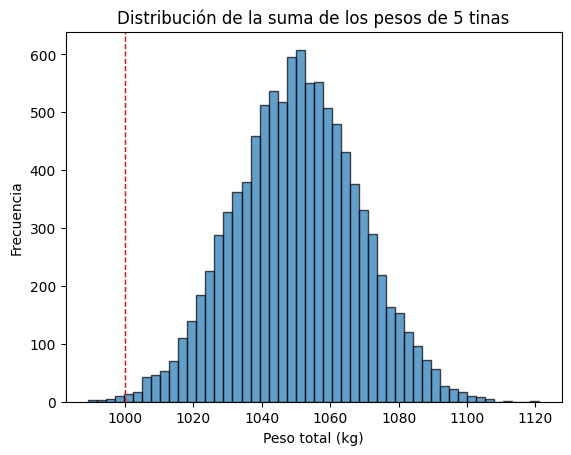

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros de la distribución triangular
a = 190
b = 210
c = 230
N = 10000  # Número de simulaciones deseadas

# Función para simular una prueba
def sim_tinas():
    pesos = np.random.triangular(a, b, c, (N, 5))
    suma_pesos = np.sum(pesos, axis=1)
    probabilidad = np.mean(suma_pesos > 1000)
    return probabilidad, suma_pesos

# Ejecutar la simulación
probabilidad, suma_pesos = sim_tinas()

# Mostrar el resultado
print(f'La probabilidad de que el peso total exceda 1000 kg es aproximadamente {probabilidad:.4f}')

# Opcional: Visualizar los resultados
plt.hist(suma_pesos, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(1000, color='r', linestyle='dashed', linewidth=1)
plt.title('Distribución de la suma de los pesos de 5 tinas')
plt.xlabel('Peso total (kg)')
plt.ylabel('Frecuencia')
plt.show()

Para ser más explicítos, esta vez sustituimos usando las funciones que obtuvimos de manera analítica.

Probabilidad de que el peso de las tinas exceda la capacidad del camión: 0.9973


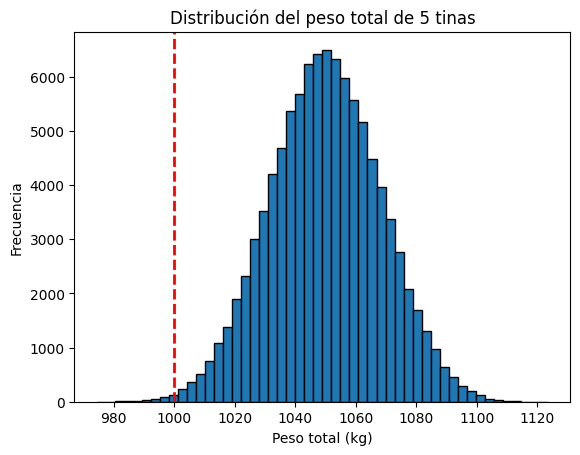

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución triangular
a, b, c = 190, 210, 230

# Función para generar una muestra de una distribución triangular usando el método de la transformada inversa
def triangular(a, b, c):
    R = random.random()
    if R < 0.5:
        return a + np.sqrt(800 * R)
    else:
        return c - np.sqrt(800 * (1 - R))

# Simulaciones deseadas
num_simulaciones = 100000
total_pesos = []

for _ in range(num_simulaciones):
    pesos = [triangular(a, b, c) for _ in range(5)]
    total_peso = sum(pesos)
    total_pesos.append(total_peso)

# Probabilidad de que el peso total exceda 1000 kg
prob = sum(peso > 1000 for peso in total_pesos) / num_simulaciones

# Mostramos la probabilidad
print(f"Probabilidad de que el peso de las tinas exceda la capacidad del camión: {prob}")

# Graficar los resultados
plt.hist(total_pesos, bins=50, edgecolor='black')
plt.axvline(1000, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución del peso total de 5 tinas')
plt.xlabel('Peso total (kg)')
plt.ylabel('Frecuencia')
plt.show()


Creamos la gráfica para visualizar el lado transitorio y el estacionario.4

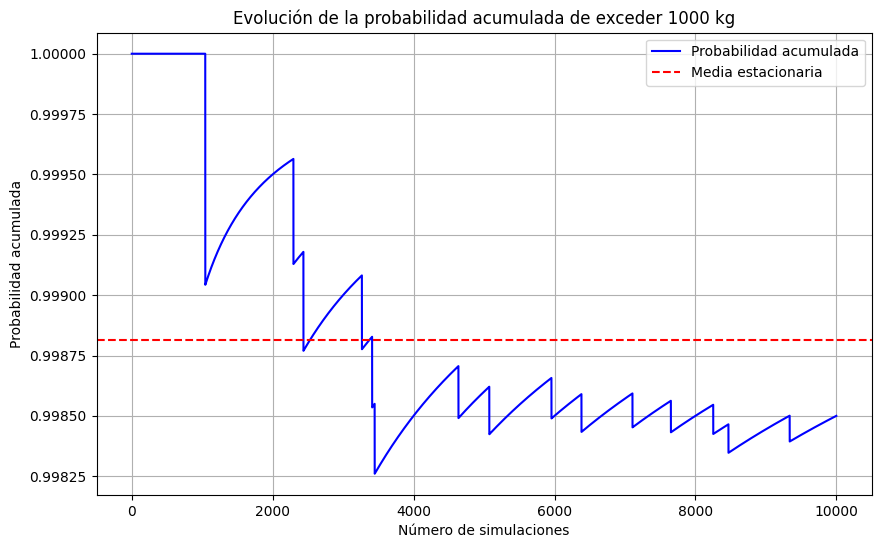

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros de la distribución triangular
a = 190
b = 210
c = 230
N = 10000  # Número de simulaciones deseadas

# Función para simular una prueba
def sim_tinas():
    pesos = np.random.triangular(a, b, c, (N, 5))
    suma_pesos = np.sum(pesos, axis=1)
    return suma_pesos

# Ejecutamos la simulación
suma_pesos = sim_tinas()

# Calculamos la probabilidad acumulada
prob_acumulada = np.cumsum(suma_pesos > 1000) / np.arange(1, N+1)

# Graficamos la probabilidad acumulada
plt.figure(figsize=(10, 6))
plt.plot(prob_acumulada, label='Probabilidad acumulada', color='blue')
plt.axhline(y=np.mean(prob_acumulada), color='red', linestyle='--', label='Media estacionaria')
plt.title('Evolución de la probabilidad acumulada de exceder 1000 kg')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()


Hacemos la simulación del segundo ejercicio tomando como base la primera simulación

Probabilidad de exceder la capacidad del camión: 0.99747
Número de días que se excede la capacidad en un año: 259.3422
Costo anual de enviar tinas excedentes: $51868.439999999995


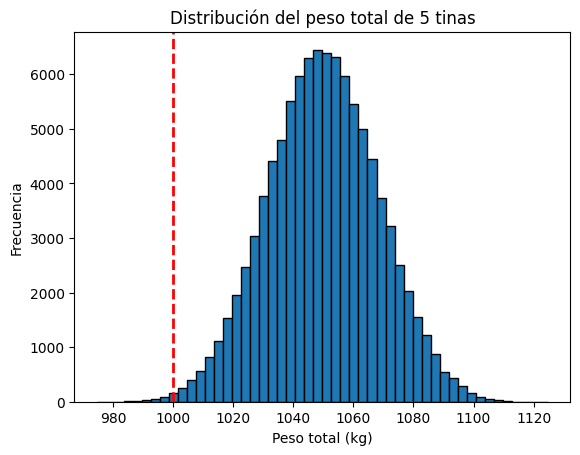

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución triangular
a, b, c = 190, 210, 230

# Función para generar una muestra de una distribución triangular usando el método de la transformada inversa
def triangular(a, b, c):
    R = random.random()
    if R < 0.5:
        return a + np.sqrt(800 * R)
    else:
        return c - np.sqrt(800 * (1 - R))

# Simulaciones
num_simulaciones = 100000
total_pesos = []
exceso = 0

for _ in range(num_simulaciones):
    pesos = [triangular(a, b, c) for _ in range(5)]
    peso_total = sum(pesos)
    total_pesos.append(peso_total)
    if peso_total > 1000:
        exceso += 1

# Probabilidad de que el peso total exceda 1000 kg
prob_exceso = exceso / num_simulaciones

# Número de días en un año que se excede la capacidad
exceso_anual = 260 * prob_exceso

# Costo de enviar tinas excedentes
cost_exceso = exceso_anual * 200

# Mostramos resultados de la simulación
print(f"Probabilidad de exceder la capacidad del camión: {prob_exceso}")
print(f"Número de días que se excede la capacidad en un año: {exceso_anual}")
print(f"Costo anual de enviar tinas excedentes: ${cost_exceso}")

# Graficamos los resultados
plt.hist(total_pesos, bins=50, edgecolor='black')
plt.axvline(1000, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución del peso total de 5 tinas')
plt.xlabel('Peso total (kg)')
plt.ylabel('Frecuencia')
plt.savefig('distribucion_peso_total.png')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')